In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import env
import os


In [34]:
# function to establish connection to MySQL workbench to retrieve data.
def get_connection(db, user=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{env.username}:{env.password}@{env.host}/{db}'

In [35]:
# function that returns the zillow data with the columns we wanted using sql querry
def zillow_data():
    sql_querry = '''
                 select 
                 bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
                 from properties_2017
                 join propertylandusetype using (propertylandusetypeid)
                 where propertylandusedesc = "Single Family Residential"
                 '''
    #Read in DataFrame from Database server
    df= pd.read_sql(sql_querry, get_connection('zillow'))
    
    return df
                
    
                

## 1.Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [36]:
# acquiring data with specified columns
df= zillow_data()
df.head()

bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  taxvaluedollarcnt  \
0         0.0          0.0                           NaN            27516.0   
1         0.0          0.0                           NaN               10.0   
2         0.0          0.0                           NaN               10.0   
3         0.0          0.0                           NaN             2108.0   
4         4.0          2.0                        3633.0           296425.0   

   yearbuilt  taxamount    fips  
0        NaN        NaN  6037.0  
1        NaN        NaN  6037.0  
2        NaN        NaN  6037.0  
3        NaN     174.21  6037.0  
4     2005.0    6941.39  6037.0

In [37]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [38]:
# below reads zillow database from codeup, writes data to csv file if local file doesnot exist
def get_zillow_data():
    filename = "zillow.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        df = zillow_data()
        df.to_csv(filename)
        return df
    

In [33]:
df= get_zillow_data()
df.head()

Unnamed: 0  bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
0           0         0.0          0.0                           NaN   
1           1         0.0          0.0                           NaN   
2           2         0.0          0.0                           NaN   
3           3         0.0          0.0                           NaN   
4           4         4.0          2.0                        3633.0   

   taxvaluedollarcnt  yearbuilt  taxamount    fips  
0            27516.0        NaN        NaN  6037.0  
1               10.0        NaN        NaN  6037.0  
2               10.0        NaN        NaN  6037.0  
3             2108.0        NaN     174.21  6037.0  
4           296425.0     2005.0    6941.39  6037.0

In [39]:
df.info(show_counts=True)
# dataframe has unwanted columns Unnamed:0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


## 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

In [23]:
# rows with a null values in the whole dataframe
df[df.isnull().any(axis=1)]

bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
0               0.0          0.0                           NaN   
1               0.0          0.0                           NaN   
2               0.0          0.0                           NaN   
3               0.0          0.0                           NaN   
5               0.0          0.0                           NaN   
8               0.0          0.0                           NaN   
9               0.0          0.0                           NaN   
10              0.0          0.0                           NaN   
12              0.0          0.0                           NaN   
13              0.0          0.0                           NaN   
16              0.0          0.0                           NaN   
17              0.0          0.0                           NaN   
22              0.0          0.0                           NaN   
36              0.0          0.0                           NaN   
37              0.0          0.0                           NaN   
38              0.0          0.0                           NaN   
43              0.0          0.0                           NaN   
45              1.0          1.0                         755.0   
48              0.0          0.0                           NaN   
49              0.0          0.0                           NaN   
148             4.0          4.0                        3002.0   
473             0.0          0.0                           NaN   
536             0.0          0.0                           NaN   
1033            3.0          3.0                        2798.0   
1626            2.0          1.0                         812.0   
2582            0.0          0.0                        2700.0   
2607            3.0          2.0                        1199.0   
2737            3.0          2.0                        1238.0   
3188            0.0          0.0                           NaN   
3207            0.0          0.0                           NaN   
3260            2.0          5.0                        4112.0   
3500            3.0          1.0                        1024.0   
3523            2.0          1.0                         782.0   
3531            3.0          1.0                        1044.0   
3532            2.0          1.0                        1018.0   
4179            1.0          1.0                         558.0   
4829            0.0          0.0                        1093.0   
5937            0.0          0.0                           NaN   
6930            0.0          0.0                           NaN   
6992            1.0          1.0                         484.0   
7148            0.0          0.0                         430.0   
7649            0.0          0.0                           NaN   
7745            3.0          2.0                        1939.0   
7759            2.0          1.0                           NaN   
8126            0.0          0.0                           NaN   
8877            0.0          0.0                           NaN   
8961            0.0          0.0                           NaN   
9478            0.0          0.0                           NaN   
9766            0.0          0.0                           NaN   
10154           1.0          1.0                         935.0   
10184           2.0          1.0                         803.0   
10395           0.0          0.0                           NaN   
10396           3.0          2.0                        1558.0   
10428           0.0          0.0                           NaN   
10430           0.0          0.0                           NaN   
10445           3.0          1.0                        1146.0   
10465           0.0          0.0                           NaN   
10560           0.0          0.0                           NaN   
10674           0.0          0.0                           NaN   
10691           0.0          0.0                 

In [40]:
df.isna().mean()
# percentage of null values, which are less than 1%. So all the missing values could be dropped.


bedroomcnt                      0.000005
bathroomcnt                     0.000005
calculatedfinishedsquarefeet    0.003941
taxvaluedollarcnt               0.000229
yearbuilt                       0.004337
taxamount                       0.002063
fips                            0.000000
dtype: float64

In [25]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

#### Takeaways
- zillow dataframe has null values in all columns except fips and we need to either impute  with some relevant data or drop the rows if possible

In [42]:
df.shape[0]

2152863

In [45]:
# If we drop all rows containing any null, how much data do we have left?
round(df.dropna().shape[0] / df.shape[0],3)

0.994

###  we still have 99% data after dropping all the rows consisting of atleast one null values. So all the null values from the entire dataframe was dropped.

In [56]:
#new df with all null values dropped
df= df.dropna()
df.shape

(2140235, 7)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [60]:
df.bathroomcnt.value_counts()

2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64

## 3.Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. Name your final function wrangle_zillow.



In [3]:
from wrangle import wrangle_zillow

In [4]:
df= wrangle_zillow()
df.head()

bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  taxvaluedollarcnt  \
0           4          2.0                          3633             296425   
1           3          4.0                          1620             847770   
2           3          2.0                          2077             646760   
3           0          0.0                          1200               5328   
4           0          0.0                           171               6920   

   yearbuilt  taxamount  fips  
0       2005    6941.39  6037  
1       2011   10244.94  6037  
2       1926    7924.68  6037  
3       1972      91.60  6037  
4       1973     255.17  6037

bedroomcnt


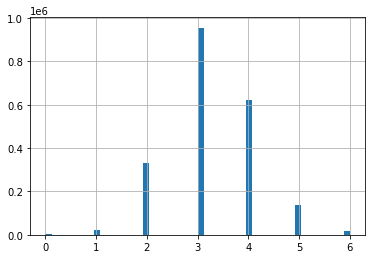

bathroomcnt


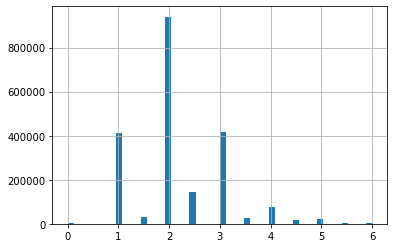

calculatedfinishedsquarefeet


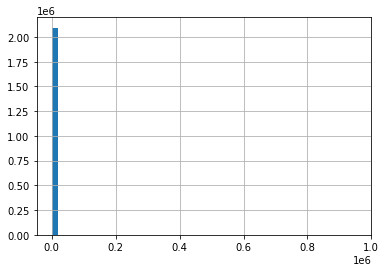

taxvaluedollarcnt


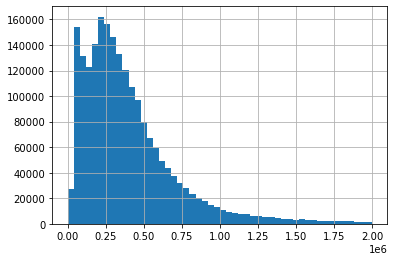

yearbuilt


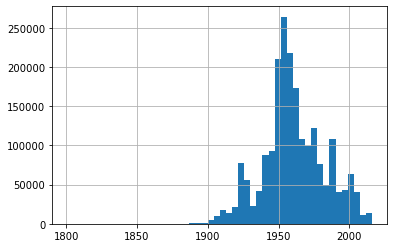

taxamount


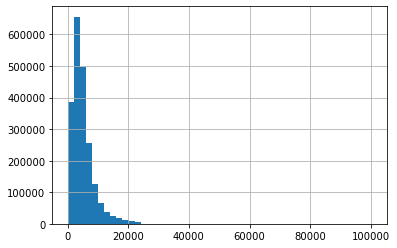

fips


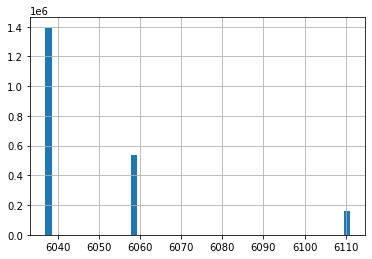

In [7]:
for col in df.columns:
    print(col)
    df[col].hist(bins=50)
    plt.show()